In [29]:
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()


In [28]:
from sklearn.preprocessing import PolynomialFeatures

#degree = 2
poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit([[2,3]])

#1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [31]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [32]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


In [33]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

poly.fit(train_input)

train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

poly.get_feature_names_out()

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))

print(lr.score(test_poly, test_target))

(42, 19)
0.99638723409801
0.9410534492233222


In [ ]:
poly = PolynomialFeatures(degree = 5, include_bias = False )
# 5차식인 다항 회귀 모델 생성
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

print(train_poly.shape)

lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

(42, 55)
0.9999999999991097
-144.40579242684848


In [35]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [36]:
# 릿지 회귀 학습
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


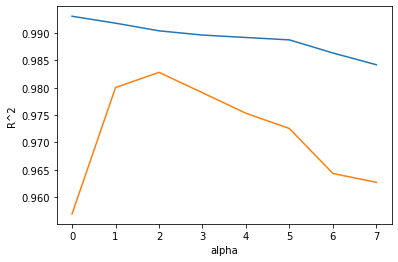

In [41]:
#추가적으로 릿지회귀와 라쏘회귀를 적용했을 때,

#알파값

#[0.001, 0.05, 0.01, 0.5, 0.1, 1, 5, 10, 50, 100]일 때,

#각 파라메터 값들에 대한 결과를 그래프로 표현

#이때 그래프에서 알파 값에 대해서는 0~9로 표현하여 파라메터 값들의 변화를 캡쳐 해서 낼 것
#또한 poly = PolynomialFeatures(degree=3, include_bias=False)으로 하여 다중 회귀 방식으로 진행할 것
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))
    
plt.plot(np.arange(0,8), train_score)
plt.plot(np.arange(0,8), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() 

In [11]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


In [42]:
from sklearn.linear_model import Lasso # 라쏘 회귀 실습

lasso=Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


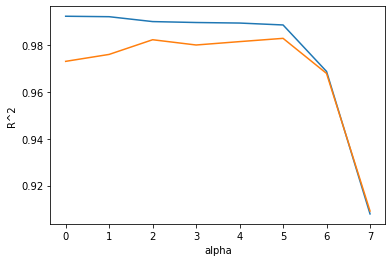

In [43]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100]
for alpha in alpha_list:
    
    lasso = Lasso(alpha = alpha, max_iter=10000)
    lasso.fit(train_scaled, train_target)
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))
    
plt.plot(np.arange(0,8), train_score)
plt.plot(np.arange(0,8), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() 

In [14]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40
